In [ ]:
!pip install minisom
!pip install som
!pip install neurralnetwork

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement neurralnetwork (from versions: none)
ERROR: No matching distribution found for neurralnetwork


lets install dependencies 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from minisom import MiniSom
import som 
import numpy as np 
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

# Load the CSV file into a DataFrame
data = pd.read_csv('Cancer_Data.csv')


X = data.iloc[:, 1:31] 

y = data.iloc[:, 0]

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)
importances = tree.feature_importances_
sorted_importances = sorted(zip(importances, X.columns), reverse=True)
for importance, feature in sorted_importances:
    print(f"{feature}: {importance}")

# Create a mask to select the features with importance > 0.1
mask = importances > 0.01

# Select the features based on the mask
selected_features = X.loc[:, mask]

X = selected_features

print(X)


radius_worst: 0.6955935182252059
concave points_worst: 0.10709687876817764
texture_worst: 0.08372821940254928
concavity_se: 0.03184137139872597
s1oothness_worst: 0.01440487734312915
co1pactness_1ean: 0.012530169300424571
texture_1ean: 0.011277152370382114
area_worst: 0.011085902417901953
area_se: 0.00936121243059898
concave points_1ean: 0.0087711185102972
concavity_worst: 0.007667163522737443
s1oothness_1ean: 0.005638576185191057
s1oothness_se: 0.0010038401246787547
texture_se: 0.0
sy11etry_worst: 0.0
sy11etry_se: 0.0
sy11etry_1ean: 0.0
radius_se: 0.0
radius_1ean: 0.0
peri1eter_worst: 0.0
peri1eter_se: 0.0
peri1eter_1ean: 0.0
fractal_di1ension_worst: 0.0
fractal_di1ension_se: 0.0
fractal_di1ension_1ean: 0.0
concavity_1ean: 0.0
concave points_se: 0.0
co1pactness_worst: 0.0
co1pactness_se: 0.0
area_1ean: 0.0
     texture_1ean  co1pactness_1ean  concavity_se  radius_worst  \
0           10.38           0.27760       0.05373        25.380   
1           17.77           0.07864       0.0186

In [ ]:
# checking data shape
cancerdata = pd.concat([selected_features, y], axis=1)
row, col = cancerdata.shape
print(f'There are {row} rows and {col} columns') 
# >> There are 178 rows and 13 columns

print(cancerdata.head(10))

NameError: ignored

standard scaling

In [ ]:
cancerdata_scaled = X.copy()

cancerdata_scaled[cancerdata_scaled.columns] = StandardScaler().fit_transform(cancerdata_scaled)
print(cancerdata_scaled.describe())

NameError: ignored

PCA reduce dimensios

In [ ]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(cancerdata_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

# >> Explained variation per principal component:  [0.50565285 0.19554243]

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

# >> Cumulative variance explained by 2 principal components: 70.12%

NameError: ignored

even more feature selecting

In [ ]:
    # Results from pca.components_
    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=cancerdata_scaled.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)



       texture_1ean  co1pactness_1ean  concavity_se  radius_worst  \
PC_1      0.276043          0.401932      0.229823      0.421366   
PC_2      0.613375          0.307168      0.280544      0.007417   

      texture_worst  area_worst  s1oothness_worst  concave points_worst  
PC_1       0.292792    0.412216          0.256812              0.458565  
PC_2       0.584151    0.009820          0.262560              0.200979  


In [ ]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")



*************** Most important features *************************


NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 2} Score 0.6972643037728601


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 3} Score 0.67525775121394


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 4} Score 0.5334604235282214
Parameter: {'n_clusters': 5} Score 0.5102279689573959


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 10} Score 0.4668545087745721


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 15} Score 0.43381672363836554


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 20} Score 0.4005410098704426


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 25} Score 0.39644061702927585


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 30} Score 0.40021616114353203


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 35} Score 0.35482773101696036


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Parameter: {'n_clusters': 40} Score 0.343474583356268


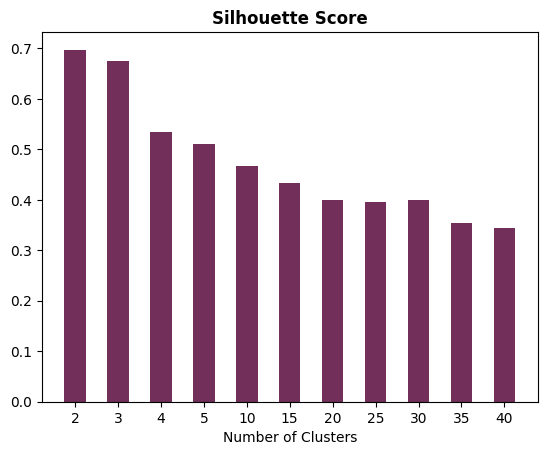

In [ ]:
# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [ ]:
# fitting KMeans    
kmeans = KMeans(n_clusters=2) 
kmeans.fit(cancerdata_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


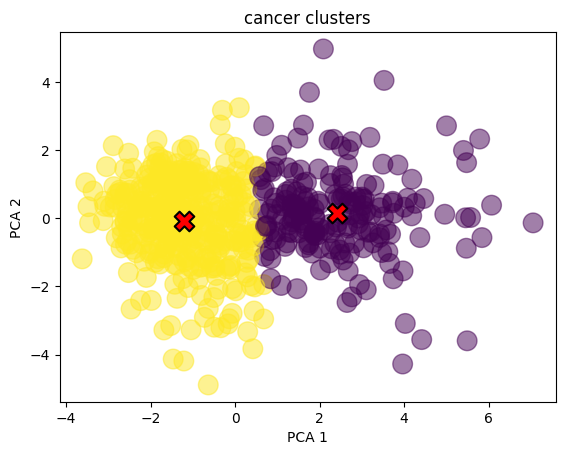

In [ ]:
    """ Visualizing the clusters

    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_2_result[:, 0]
    y = pca_2_result[:, 1]

    plt.scatter(x, y, c=kmeans.labels_, alpha=0.5, s=200)  # plot different colors per cluster
    plt.title('cancer clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()